# Lab 3: Pandas Tutorial
## TA: Suraj Yerramilli
## Date: January 28th, 2019

In [1]:
# Import libraries (run this block before anything else)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# inline plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to pandas

This lab is not meant to be a detailed demonstration of Pandas, but rather a tutorial on how to use pandas effectively for data analysis. We will not be going into the finer details. The tutorial and the exercises are, however, self-contained. If you are comfortable with Pandas, in particular with groupby and aggregate, you may skip the tutorial.

We will be analyzing the NYC-flights14 dataset in both the tutorial and the exercise. It contains flights data from the Bureau of Transporation Statistics for all the flights that departed from New York City airports from Jan-Oct 2014. The dataset is available at:

https://raw.githubusercontent.com/Rdatatable/data.table/master/vignettes/flights14.csv

Download it to the `data` folder either using the browser or using `wget` (available only on Linux/Mac) on the command line.

## Data Structures

There are two main data structures implemented in pandas:

1. `Series` is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
2. `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. It is similar to R's data.frame. 

## Reading from delimiter-seperated files

The `read_csv` function can be used to read delimiter-seperated files. By default, it assumes that the file is comma-separated. We read in the flight14 dataset below.

In [2]:
# load the flights14 dataset. Assumed to be in the data folder
# read_csv with the default options - first row header and comma-separated file
flights = pd.read_csv("../data/flights14.csv")
flights.head(10) # print first 10 rows

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19
3,2014,1,1,-8,-26,AA,LGA,PBI,157,1035,7
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13
5,2014,1,1,4,0,AA,EWR,LAX,339,2454,18
6,2014,1,1,-2,-18,AA,JFK,LAX,338,2475,21
7,2014,1,1,-3,-14,AA,JFK,LAX,356,2475,15
8,2014,1,1,-1,-17,AA,JFK,MIA,161,1089,15
9,2014,1,1,-2,-14,AA,JFK,SEA,349,2422,18


The column names can be accessed from the `.columns` attribute.

In [3]:
# column names
flights.columns

Index(['year', 'month', 'day', 'dep_delay', 'arr_delay', 'carrier', 'origin',
       'dest', 'air_time', 'distance', 'hour'],
      dtype='object')

## Selecting rows and columns

To select a particular column, we can index with its name. This can also be use to set values or create new columns.

In [4]:
# select the carrier column
# you can also use flights.carrier
flights["carrier"]

0         AA
1         AA
2         AA
3         AA
4         AA
5         AA
6         AA
7         AA
8         AA
9         AA
10        AA
11        AA
12        AA
13        AA
14        AA
15        AA
16        AA
17        AA
18        AA
19        AA
20        AA
21        AA
22        AA
23        AA
24        AA
25        AA
26        AA
27        AA
28        AA
29        AA
          ..
253286    UA
253287    UA
253288    UA
253289    UA
253290    UA
253291    UA
253292    UA
253293    UA
253294    UA
253295    UA
253296    UA
253297    UA
253298    UA
253299    UA
253300    UA
253301    UA
253302    UA
253303    UA
253304    UA
253305    UA
253306    UA
253307    UA
253308    UA
253309    UA
253310    UA
253311    UA
253312    UA
253313    MQ
253314    MQ
253315    MQ
Name: carrier, dtype: object

In [5]:
# create new column - delays other than departure delay
flights["other_delays"] = flights["arr_delay"]-flights["dep_delay"]
flights.head()

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9,-1
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11,16
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19,7
3,2014,1,1,-8,-26,AA,LGA,PBI,157,1035,7,-18
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13,-1


You can also access the individual columns as attributes. For example, `flights.carrier` will return the "carrier" column. Note that this syntax **cannot** be used to create new columns.

For selecting multiple columns, pass them as a list. For example, to select the "carrier" and "origin" columns:

In [6]:
# selecting multiple columns
flights[["carrier","origin"]]

,carrier,origin
0,AA,JFK
1,AA,JFK
2,AA,JFK
3,AA,LGA
4,AA,JFK
5,AA,EWR
6,AA,JFK
7,AA,JFK
8,AA,JFK
9,AA,JFK


You can subset rows by regular numerical slices.

In [7]:
# slicing the fist five rows
flights[:5]

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9,-1
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11,16
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19,7
3,2014,1,1,-8,-26,AA,LGA,PBI,157,1035,7,-18
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13,-1


In [8]:
# selecting the last 6 rows
flights[-6:] # negative indexing

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
253310,2014,10,31,18,-14,UA,EWR,LAS,291,2227,16,-32
253311,2014,10,31,1,-30,UA,LGA,IAH,201,1416,14,-31
253312,2014,10,31,-5,-14,UA,EWR,IAH,189,1400,8,-9
253313,2014,10,31,-8,16,MQ,LGA,RDU,83,431,11,24
253314,2014,10,31,-4,15,MQ,LGA,DTW,75,502,11,19
253315,2014,10,31,-5,1,MQ,LGA,SDF,110,659,8,6


You can combine row and column selection by doing each one succession in any order. For example, the following code 

1. first selects rows 23 to 29 (30 excluded)
2. then selects the carrier and origin column

The order can be reversed.

In [9]:
# combining both row slicing and column selection
flights[23:30][["carrier","origin"]]

,carrier,origin
23,AA,LGA
24,AA,LGA
25,AA,EWR
26,AA,LGA
27,AA,LGA
28,AA,LGA
29,AA,LGA


You can also subset rows and columns using traditional numerical slices with the `iloc` method. For example, the following code subsets rows 2 to 4 and columns 4 to 8.

In [10]:
# Subsetting using numbers
flights.iloc[2:5,4:9]

,arr_delay,carrier,origin,dest,air_time
2,9,AA,JFK,LAX,351
3,-26,AA,LGA,PBI,157
4,1,AA,JFK,LAX,350


## Logical subsets

In [11]:
# subset departures from JFK
dat_JFK = flights[flights.origin=="JFK"]
dat_JFK

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9,-1
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11,16
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19,7
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13,-1
6,2014,1,1,-2,-18,AA,JFK,LAX,338,2475,21,-16
7,2014,1,1,-3,-14,AA,JFK,LAX,356,2475,15,-11
8,2014,1,1,-1,-17,AA,JFK,MIA,161,1089,15,-16
9,2014,1,1,-2,-14,AA,JFK,SEA,349,2422,18,-12
11,2014,1,1,7,-5,AA,JFK,SFO,365,2586,17,-12
12,2014,1,1,3,1,AA,JFK,BOS,39,187,12,-2


In [12]:
# departues in either Los Angeles and San Francisco 
dat_cal = flights[flights.dest.isin(["LAX","SFO"])]
dat_cal

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9,-1
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11,16
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19,7
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13,-1
5,2014,1,1,4,0,AA,EWR,LAX,339,2454,18,-4
6,2014,1,1,-2,-18,AA,JFK,LAX,338,2475,21,-16
7,2014,1,1,-3,-14,AA,JFK,LAX,356,2475,15,-11
11,2014,1,1,7,-5,AA,JFK,SFO,365,2586,17,-12
13,2014,1,1,142,133,AA,JFK,LAX,345,2475,19,-9
155,2014,1,1,-4,11,B6,JFK,LAX,349,2475,9,15


In [13]:
# Example of numerical column bases subsetting
# Subset delayed arrivals
flights[flights.arr_delay>0]

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9,-1
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11,16
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19,7
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13,-1
12,2014,1,1,3,1,AA,JFK,BOS,39,187,12,-2
13,2014,1,1,142,133,AA,JFK,LAX,345,2475,19,-9
15,2014,1,1,18,69,AA,JFK,ORD,155,740,17,51
16,2014,1,1,25,36,AA,JFK,IAH,234,1417,16,11
17,2014,1,1,-1,1,AA,JFK,AUS,232,1521,17,2
18,2014,1,1,191,185,AA,EWR,DFW,214,1372,16,-6


In [14]:
# multiple conditions can be combined using relational operators
# subset departs from JFK to Los Angeles
flights[(flights.origin=="JFK") & (flights.dest=="LAX")]

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,1,1,14,13,AA,JFK,LAX,359,2475,9,-1
1,2014,1,1,-3,13,AA,JFK,LAX,363,2475,11,16
2,2014,1,1,2,9,AA,JFK,LAX,351,2475,19,7
4,2014,1,1,2,1,AA,JFK,LAX,350,2475,13,-1
6,2014,1,1,-2,-18,AA,JFK,LAX,338,2475,21,-16
7,2014,1,1,-3,-14,AA,JFK,LAX,356,2475,15,-11
13,2014,1,1,142,133,AA,JFK,LAX,345,2475,19,-9
155,2014,1,1,-4,11,B6,JFK,LAX,349,2475,9,15
157,2014,1,1,3,-10,B6,JFK,LAX,349,2475,16,-13
162,2014,1,1,3,1,B6,JFK,LAX,347,2475,11,-2


You can combine logical subsets and selecting individual columns. The following code

1. selects flights which cover more than 2500 miles
2. then subsets the origin, dest, and distance columns
3. and finally, selects only unique rows.

In [15]:
flights[flights.distance>2500][["origin","dest","distance"]].drop_duplicates()

,origin,dest,distance
11,JFK,SFO,2586
151,JFK,SMF,2521
165,JFK,SJC,2569
187,JFK,OAK,2576
443,JFK,HNL,4983
482,EWR,SFO,2565
558,EWR,HNL,4963
70246,EWR,HNL,4962
127050,EWR,ANC,3370


Teh above `DataFrame` shows unique origin-destination pairs whose distance is greater than 2500 miles. These are direct flights from east-coast to cities in California (San Francisco, Sacremento, Oakland, San Jose), Alaska and Hawaii.

## Basic aggregation - counting

**Question**: What are the most common destinations from NYC airports?

The total number of fligths to each destination can be found by using the `value_counts` method of the destination column. It returns the counts sorted in descending order. We can then select the top 10 destinations using regular row selections.

In [16]:
flights.dest.value_counts()

LAX    14434
ATL    12808
SFO    11907
MCO    11709
BOS    11609
ORD    11589
MIA     9928
CLT     9624
FLL     9471
DCA     6748
DFW     6487
DTW     6010
DEN     5761
TPA     5704
PBI     5543
IAH     5426
RDU     5010
SJU     4976
LAS     4910
BNA     4681
MSP     4163
STL     3805
PHX     3786
CLE     3562
MDW     3474
IAD     3324
SEA     3179
CMH     3155
BUF     2667
MSY     2628
       ...  
OAK      247
SMF      246
OKC      223
ILM      223
BDL      210
LIT      204
TUL      201
DSM      180
ALB      169
PVD      169
EGE      165
MVY      159
AVL      147
ROA      125
BHM      124
HYA       75
BZN       66
TVC       56
EYW       32
JAC       20
PSP       17
DAL       15
HDN       13
ANC       13
MTJ       12
MYR       11
SBN        8
MDT        5
AGS        3
AVP        1
Name: dest, dtype: int64

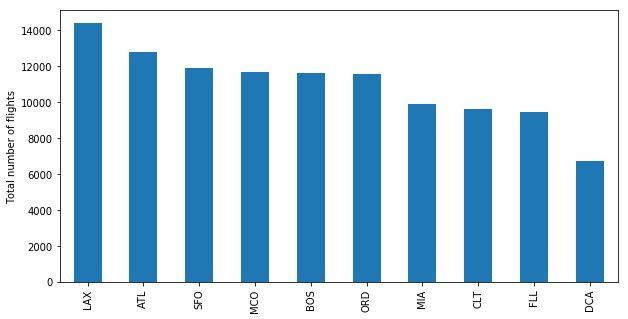

In [17]:
# select only the top 10 destinations and print a bar plot
top10 = flights.dest.value_counts()[:10]
top10.plot(kind="bar")
plt.ylabel("Total number of flights")
plt.show()

What about the carriers with the most number of flights? We can do it using the `value_counts` method of the carrier column.

In [18]:
# Number of flights per carrier
flights.carrier.value_counts()

UA    46267
B6    44479
DL    41683
EV    39819
AA    26302
MQ    18559
US    16750
WN    11902
VX     4797
FL     1251
AS      574
F9      473
HA      260
OO      200
Name: carrier, dtype: int64

A more interesting question would be the number of flights for each carrier from each of the NYC airports. This can be done using the `crosstab` function.

In [19]:
# Number of flights per carrier and origin airport
pd.crosstab(flights.carrier,flights.origin,margins=True)

origin,EWR,JFK,LGA,All
carrier,,,,
AA,2649,11923,11730,26302
AS,574,0,0,574
B6,5473,34220,4786,44479
DL,4153,18860,18670,41683
EV,28328,1069,10422,39819
F9,0,0,473,473
FL,0,0,1251,1251
HA,0,260,0,260
MQ,167,5444,12948,18559


## Groupby and aggregate

Suppose we want to analyze data for each of the three origin airports separately. One way would be to use logical subsets to create three new dataframes, one for each origin airport. 

The `groupby` method provides a convenient way to split the dataset by groups (in this case - groups in a single column) instead of manually creating subsets. It returns a `GroupBy` object. The different groups can then be iteratively accessed. This can be useful for doing similar analysis (eg: plots,logical subsets, etc.) on all the groups.

In [20]:
origin_groups = flights.groupby(by=["origin"])
for group_name,group_dat in origin_groups:
    print("Origin Airport: {}".format(group_name))
    print(group_dat.head(5))
    print("*************")

Origin Airport: EWR
    year  month  day  dep_delay  arr_delay carrier origin dest  air_time  \
5   2014      1    1          4          0      AA    EWR  LAX       339   
10  2014      1    1         -5        -17      AA    EWR  MIA       161   
18  2014      1    1        191        185      AA    EWR  DFW       214   
25  2014      1    1         -1         -2      AA    EWR  DFW       214   
41  2014      1    1         -3        -10      AA    EWR  MIA       154   

    distance  hour  other_delays  
5       2454    18            -4  
10      1085    16           -12  
18      1372    16            -6  
25      1372    14            -1  
41      1085     6            -7  
*************
Origin Airport: JFK
   year  month  day  dep_delay  arr_delay carrier origin dest  air_time  \
0  2014      1    1         14         13      AA    JFK  LAX       359   
1  2014      1    1         -3         13      AA    JFK  LAX       363   
2  2014      1    1          2          9      AA    J

A more useful feature of the `GroupBy` object is its `agg` or `aggregate` methods. These allow you to obtain summary statistics for some or all of the columns. The summary statistics for the columns can either be the same or different (particularly when they of different datatypes). The aggregating function should take in a `Series` or a numpy 1darray object and return a scalar.

If the same summary statistic(s) is to be returned for all the groups, pass a list of functions/ function names (not always available). 

In [21]:
origin_groups[["arr_delay","dep_delay"]].agg(['mean','median',np.std])

arr_delay                    dep_delay                  
             mean median        std       mean median        std
origin                                                          
EWR     10.026121     -3  47.103222  15.212483      0  43.156344
JFK      7.731465     -3  46.233264  11.446167     -2  41.407367
LGA      6.601968     -5  43.746851  10.605000     -3  40.117213

If different statistics are to be computed for different groups, pass a dictionary whose keys are the columns and their corresponding values are either a function or a list of functions (Names can be passed when available).

In [22]:
dat_summary = origin_groups.agg({"arr_delay":['mean','median','std'],
                                "dep_delay":['min','median',np.max],
                                "distance":['mean'],
                                "dest":[pd.Series.nunique],
                                "origin":'count'})
dat_summary

arr_delay                   dep_delay                  distance  \
             mean median        std       min median  amax         mean   
origin                                                                    
EWR     10.026121     -3  47.103222       -27      0  1498  1117.360561   
JFK      7.731465     -3  46.233264       -34     -2  1241  1413.862941   
LGA      6.601968     -5  43.746851      -112     -3   973   777.468194   

          dest origin  
       nunique  count  
origin                 
EWR         86  87400  
JFK         65  81483  
LGA         70  84433

To access the statistics for the individual columns, you can subset them like a regular DataFrame.

In [23]:
# subset summary statistics of arr_delay
dat_summary["arr_delay"]

,mean,median,std
origin,,,
EWR,10.026121,-3,47.103222
JFK,7.731465,-3,46.233264
LGA,6.601968,-5,43.746851


Groups need not be restricted to single columns. You can group by multiple columns. For example, 

In [24]:
# groupby both origin and carrier
dat_multi_groups = flights.groupby(by=["origin","carrier"]).agg({"arr_delay":['mean','median','std']})
dat_multi_groups

arr_delay                  
                     mean median        std
origin carrier                             
EWR    AA       11.253681   -3.0  75.143447
       AS       -3.888502  -14.5  46.347930
       B6        8.213046   -6.0  45.033081
       DL       10.737539   -5.0  59.024737
       EV       14.403594   -1.0  47.184188
       MQ       25.832335    6.0  52.559966
       OO      -10.000000  -10.0        NaN
       UA        7.778873   -3.0  42.405326
       US       -0.355747   -8.0  36.054403
       VX        1.614964  -12.0  52.550629
       WN       13.399418   -2.0  52.365177
JFK    AA        6.283318   -4.0  47.438569
       B6       10.493922   -2.0  45.042205
       DL        4.063998   -7.0  49.798321
       EV       17.089804   -4.0  58.227850
       HA       12.450000   -1.0  84.215809
       MQ        9.985672   -1.0  39.511083
       UA        3.594292   -5.0  40.620795
       US        6.113422   -3.0  39.454871
       VX        4.198853   -4.0  43.086786
LGA    AA        3.322762   -6.0  42.290618
       B6       10.207689   -2.0  45.554073
       DL        5.015908   -7.0  49.130350
       EV        9.611495   -6.0  49.618858
       F9       26.608879   11.0  52.099616
       FL       13.673062   -2.0  57.520621
       MQ        9.079086    0.0  35.116981
       OO       14.949749    1.0  52.228011
       UA        8.824570   -2.0  45.543425
       US        0.170729   -6.0  28.203505
       VX      -16.000000  -18.0  13.043882
       WN        9.739253   -3.0  46.685388

## (Row) Index

In [25]:
# Index of flights dataset
print(flights.index)

RangeIndex(start=0, stop=253316, step=1)


In [26]:
# Shuffle rows and print the first 10
flights.sample(frac=1,random_state=1)[:10]

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
241240,2014,10,17,31,40,DL,JFK,PHX,310,2153,9,9
2207,2014,1,4,276,262,EV,EWR,IAD,44,212,14,-14
178105,2014,8,4,-6,-8,MQ,JFK,RDU,74,427,12,-2
55016,2014,3,14,-2,-15,UA,LGA,DEN,228,1620,17,-13
69130,2014,3,30,-8,-12,MQ,LGA,ATL,105,762,8,-4
20348,2014,1,29,-4,24,AA,JFK,MIA,174,1089,9,28
123994,2014,6,4,-5,-23,DL,LGA,RDU,63,431,20,-18
210934,2014,9,11,-8,-6,VX,JFK,LAX,333,2475,6,2
24721,2014,2,4,-2,-15,B6,JFK,MCO,140,944,8,-13
224007,2014,9,26,-2,-15,UA,JFK,SFO,318,2586,7,-13


In [27]:
# Shuffle rows, drop indices and print the first 10
flights.sample(frac=1,random_state=1).reset_index(drop=True).head(n=10)

,year,month,day,dep_delay,arr_delay,carrier,origin,dest,air_time,distance,hour,other_delays
0,2014,10,17,31,40,DL,JFK,PHX,310,2153,9,9
1,2014,1,4,276,262,EV,EWR,IAD,44,212,14,-14
2,2014,8,4,-6,-8,MQ,JFK,RDU,74,427,12,-2
3,2014,3,14,-2,-15,UA,LGA,DEN,228,1620,17,-13
4,2014,3,30,-8,-12,MQ,LGA,ATL,105,762,8,-4
5,2014,1,29,-4,24,AA,JFK,MIA,174,1089,9,28
6,2014,6,4,-5,-23,DL,LGA,RDU,63,431,20,-18
7,2014,9,11,-8,-6,VX,JFK,LAX,333,2475,6,2
8,2014,2,4,-2,-15,B6,JFK,MCO,140,944,8,-13
9,2014,9,26,-2,-15,UA,JFK,SFO,318,2586,7,-13


Indexes are not restricted to being integer types - they can be of any type. For instance, the index of the top10 Series is of string type.

In [28]:
print(top10.index)

Index(['LAX', 'ATL', 'SFO', 'MCO', 'BOS', 'ORD', 'MIA', 'CLT', 'FLL', 'DCA'], dtype='object')


If you want to replace this index with a regular RangeIndex and add the original index as the column, use the `reset_index` method with argument `drop=False` 

In [29]:
top10.reset_index(drop=False,name="count")

,index,count
0,LAX,14434
1,ATL,12808
2,SFO,11907
3,MCO,11709
4,BOS,11609
5,ORD,11589
6,MIA,9928
7,CLT,9624
8,FLL,9471
9,DCA,6748


In [30]:
dat_summary.index

Index(['EWR', 'JFK', 'LGA'], dtype='object', name='origin')

In [31]:
dat_multi_groups.index

MultiIndex(levels=[['EWR', 'JFK', 'LGA'], ['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 0, 2, 3, 4, 7, 8, 10, 11, 12, 0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13]],
           names=['origin', 'carrier'])